In [153]:
import pandas as pd
import numpy as np


In [155]:
df=pd.read_csv("spam.csv",encoding="latin1")
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4527,ham,HOW ARE U? I HAVE MISSED U! I HAVENT BEEN UP 2...,NaN,NaN,NaN
1243,ham,No shoot me. I'm in the docs waiting room. :/,NaN,NaN,NaN
4178,ham,Can Ì_ send me a copy of da report?,NaN,NaN,NaN
792,ham,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...,NaN,NaN,NaN
2600,ham,"As usual..iam fine, happy &amp; doing well..:)",NaN,NaN,NaN
5550,ham,"Cool, what time you think you can get here?",NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
4836,ham,....photoshop makes my computer shut down.,NaN,NaN,NaN
464,ham,Ok i am on the way to railway,NaN,NaN,NaN
1689,ham,Bring tat cd don forget,NaN,NaN,NaN


In [157]:
df.shape

(5572, 5)

In [159]:
#data cleaning
#EDA
#text preprocessing
#model building
#evaluation
# improvement
# website
#deploy

## 1. Data Cleaning

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [164]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [166]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [168]:
#renaming columns


In [170]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [172]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [174]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [176]:
df["target"]=encoder.fit_transform(df["target"])

In [178]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [180]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [182]:
df.duplicated().sum()

403

In [184]:
df=df.drop_duplicates(keep="first")

In [186]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [188]:
df.shape

(5169, 2)

## 2. EDA

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns


In [193]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16be3399d60>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

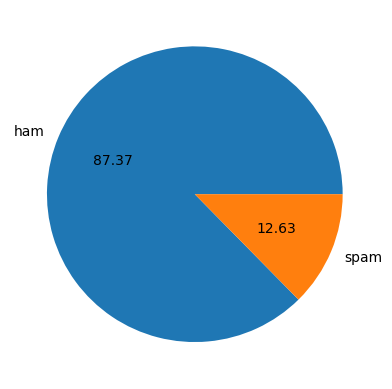

In [195]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

In [197]:
#data is ibalanced

In [199]:

!pip install nltk

In [200]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bhati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [201]:
df["characters"]=df["text"].apply(len)

C:\Users\bhati\AppData\Local\Temp\ipykernel_30680\3522744136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["characters"]=df["text"].apply(len)


In [202]:
# number of words

In [203]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\bhati\AppData\Local\Temp\ipykernel_30680\1558380898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [209]:
df.head()

,target,text,characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [211]:
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\bhati\AppData\Local\Temp\ipykernel_30680\4263227907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [213]:
df.head()

,target,text,characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [215]:
df[["characters","num_words","num_sentences"]].describe()

,characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [217]:
df[df["target"]==0][["characters","num_words","num_sentences"]].describe()

,characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [219]:
df[df["target"]==0][["characters","num_words","num_sentences"]]

,characters,num_words,num_sentences
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


<Axes: xlabel='characters', ylabel='Count'>

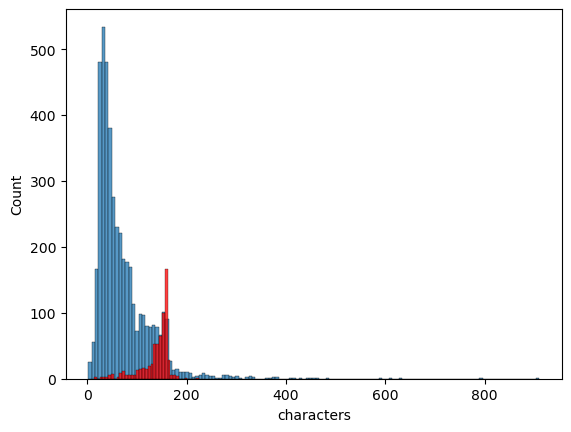

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df[df["target"]==0] ["characters"])
sns.histplot(df[df["target"]==1]["characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

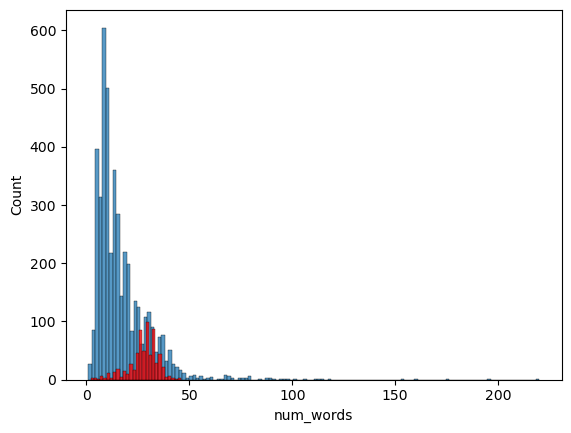

In [223]:
sns.histplot(df[df["target"]==0] ["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")

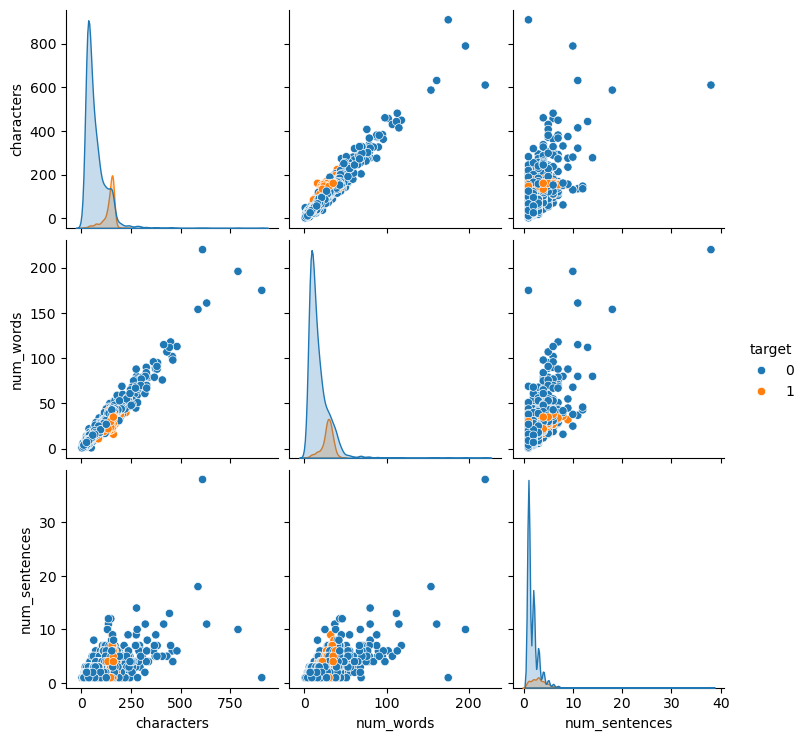

In [225]:
sns.pairplot(df,hue="target")

<Axes: >

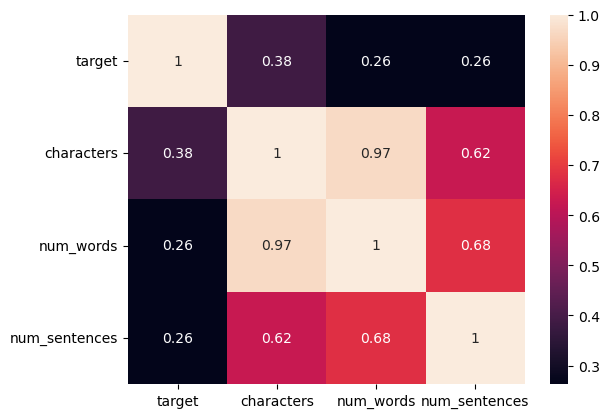

In [226]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing

In [228]:
#lower case
# Tokenization
# removing special characters
# removing stop words
# stemming
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [229]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        
        if i.isalnum():
            y.append(i)
            text=y[:]
            y.clear()
            for i in text:
                i = str(i)  # make sure it's a string
                if i not in stopwords.words("english") and i not in string.punctuation:
                    y.append(i)
            text=y[:]
            y.clear()
            for i in text:
                a= ps.stem(i)
                y.append(a)
            

    

    
            
            
        
    return " ".join(y)

In [230]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [244]:
transform_text("Hi How Are you Shivam?")

'hi shivam'

In [246]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

'love'

In [248]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [250]:
df["transformed_text"]=df["text"].apply(transform_text)
df["transformed_text"]


C:\Users\bhati\AppData\Local\Temp\ipykernel_30680\702392265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(transform_text)


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [251]:
df.head()

,target,text,characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [252]:
!pip install wordcloud

from wordcloud import WordCloud


wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")


In [253]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

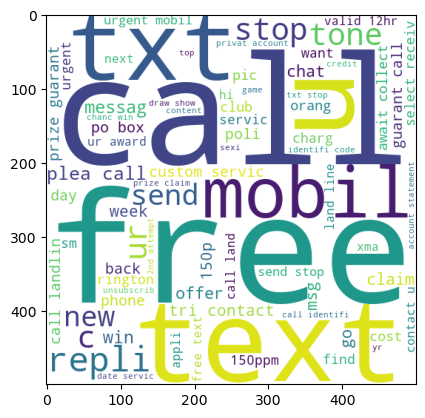

In [254]:
plt.imshow(spam_wc)

In [255]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

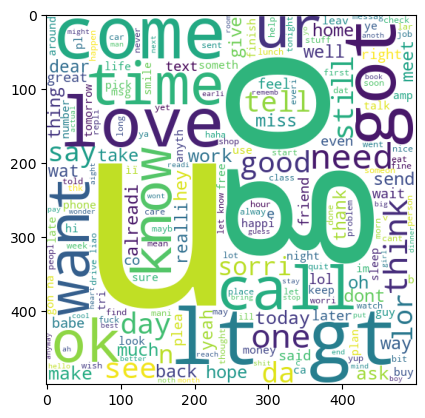

In [256]:
plt.imshow(ham_wc)

In [257]:
df.head()

,target,text,characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [258]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [259]:
len(spam_corpus)

9930

In [260]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

## Model Building

In [272]:
from sklearn.feature_extraction.text  import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [274]:
x=tfidf.fit_transform(df["transformed_text"]).toarray()

In [276]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [278]:
x.shape
y=df["target"].values

In [280]:
from sklearn.model_selection import train_test_split


In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [284]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)


In [285]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [299]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
accuracy_score(y_test,y_pred1)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
      



[[794 102]
 [ 25 113]]
0.5255813953488372


In [307]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
accuracy_score(y_test,y_pred2)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
      


[[893   3]
 [ 27 111]]
0.9736842105263158


In [305]:
mnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
accuracy_score(y_test,y_pred3)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
      


[[896   0]
 [ 42  96]]
1.0


In [311]:
import pickle
pickle.dump(tfidf,open("vectorizer.pk1","wb"))
pickle.dump(mnb,open("model.pk1","wb"))